+ Title: Exploratory Analysis of Kiva Crowdfunding Data (Kaggle)
+ Author: Gaurav Modi
+ Date: 2018-04-10
+ Description: "Exploration of Kaggle Kiva Data Set"
+ Slug: kaggle_kiva_exploration
+ Tags: eda, python, matplotlib, seaborn

- Data Source: https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding/data
- Notebook on Kaggle: https://www.kaggle.com/modigaurav/exploration-of-kiva

### Importing Packages

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid')
# import warnings; warnings.filterwarnings('ignore')

# Auto reload any script without the need to restart jupyter notebook server
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Change the format of precisions of decimals
pd.set_option('display.float_format', lambda x: '{:f}'.format(x))

SEED = 42
PATH = '../data/data-science-for-good-kiva-crowdfunding/'

In [2]:
color = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#feb308", "e78ac3"]

%matplotlib inline
%config InlineBackend.figure_format='retina'
# Change defualt size of matplotlibs plots
plt.rcParams['figure.figsize'] = (8.0, 5.0)


### Functions

In [3]:
## Data Description
def describe(df):
    print('======================================')
    print('No. of Rows.:{0}\nNo. of Columns:{1}\n'.format(df.shape[0], df.shape[1]))
    print('======================================')
    data_type = DataFrame(df.dtypes, columns=['Data Type'])
    null_count =  DataFrame(df.isnull().sum(), columns=['Null Count'])
    not_null_count = DataFrame(df.notnull().sum(), columns=['Not Null Count'])
    unique_count = DataFrame(df.nunique(), columns=['Unique Count'])
    categorical = loans.describe(include='O').T
    count = loans.isnull().sum().sort_values(ascending=False)
    percent = loans.isnull().sum().sort_values(ascending=False)/loans.shape[0]*100
    missing = pd.DataFrame({'Missing Count':count , 'Missing count Percent':percent})#, columns=['Missing Count', 'Percent count'])
    joined = pd.concat([data_type, null_count, not_null_count, unique_count, categorical, missing], axis=1)
    display(joined)
    display(df.describe().T)
    return None

## Adding more time columns
def add_datepart(df, date_column):
    date_series = df[date_column]
    df[date_column] = pd.to_datetime(date_series, infer_datetime_format=True)
    for n in ('Year', 'Month', 'Week', 'Day', 'Weekday_Name', 'Dayofweek', 'Dayofyear'):
        df['Date'+'_'+n] = getattr(date_series.dt, n.lower())
        
## Proportion Plot
def proportion_plot(column, title='', figsize=(15, 5), top=20):
    value_count = (100*column.value_counts()/column.shape[0])[:top]
    plt.subplots(figsize=figsize)
    sns.set_style("whitegrid")
    g = sns.barplot(x=value_count.index, y=value_count.values)
    plt.title(title, size=20)
    plt.xlabel(column.name, size=15); plt.ylabel('percentage', size=15)
    plt.xticks(size=12, rotation=90); plt.yticks(size=15)

In [4]:
loans = pd.read_csv(f'{PATH}kiva_loans.csv')

In [5]:
loans.sample(n=5).T

,194707,488204,333959,565110,359067
id,842569,1148467,980969,1226306,1005941
funded_amount,950.000000,750.000000,500.000000,1525.000000,325.000000
loan_amount,950.000000,750.000000,750.000000,1525.000000,325.000000
activity,Personal Housing Expenses,Agriculture,Personal Medical Expenses,Cattle,Food Production/Sales
sector,Housing,Agriculture,Health,Agriculture,Food
use,To renovate her house,"to purchase seeds, manure, and more.",to pay for dental treatment,to buy a cow and other items.,to purchase ingredients for snack vending like...
country_code,TJ,PE,MX,PE,PH
country,Tajikistan,Peru,Mexico,Peru,Philippines
region,Panjakent,Paucartambo - Cusco,NaN,anta - tambo real,"Plaridel-Looc Proper, Plaridel, Misamis Occide..."
currency,TJS,PEN,MXN,PEN,PHP


In [6]:
df_describe = describe(loans)

No. of Rows.:671205
No. of Columns:20



,Data Type,Null Count,Not Null Count,Unique Count,count,unique,top,freq,Missing Count,Missing count Percent
activity,object,0,671205,163,671205,163,Farming,72955,0,0.000000
borrower_genders,object,4221,666984,11298,666984,11298,female,426502,4221,0.628869
country,object,0,671205,87,671205,87,Philippines,160441,0,0.000000
country_code,object,8,671197,86,671197,86,PH,160441,8,0.001192
currency,object,0,671205,67,671205,67,PHP,160440,0,0.000000
date,object,0,671205,1298,671205,1298,2017-03-20,1308,0,0.000000
disbursed_time,object,2396,668809,5719,668809,5719,2017-02-01 08:00:00+00:00,2800,2396,0.356970
funded_amount,float64,0,671205,610,NaN,NaN,NaN,NaN,0,0.000000
funded_time,object,48331,622874,498007,622874,498007,2016-09-21 13:03:24+00:00,33,48331,7.200632
id,int64,0,671205,671205,NaN,NaN,NaN,NaN,0,0.000000


,count,mean,std,min,25%,50%,75%,max
id,671205.000000,993248.593734,196611.275423,653047.000000,823072.000000,992780.000000,1163653.000000,1340339.000000
funded_amount,671205.000000,785.995061,1130.398941,0.000000,250.000000,450.000000,900.000000,100000.000000
loan_amount,671205.000000,842.397107,1198.660073,25.000000,275.000000,500.000000,1000.000000,100000.000000
partner_id,657698.000000,178.199616,94.247581,9.000000,126.000000,145.000000,204.000000,536.000000
term_in_months,671205.000000,13.739022,8.598919,1.000000,8.000000,13.000000,14.000000,158.000000
lender_count,671205.000000,20.590922,28.459551,0.000000,7.000000,13.000000,24.000000,2986.000000


## a) Loan Amount Exploration

### Loan Amount Distribution

Higly skewed because of few outliers, therefore filtering loan_amount below $5000

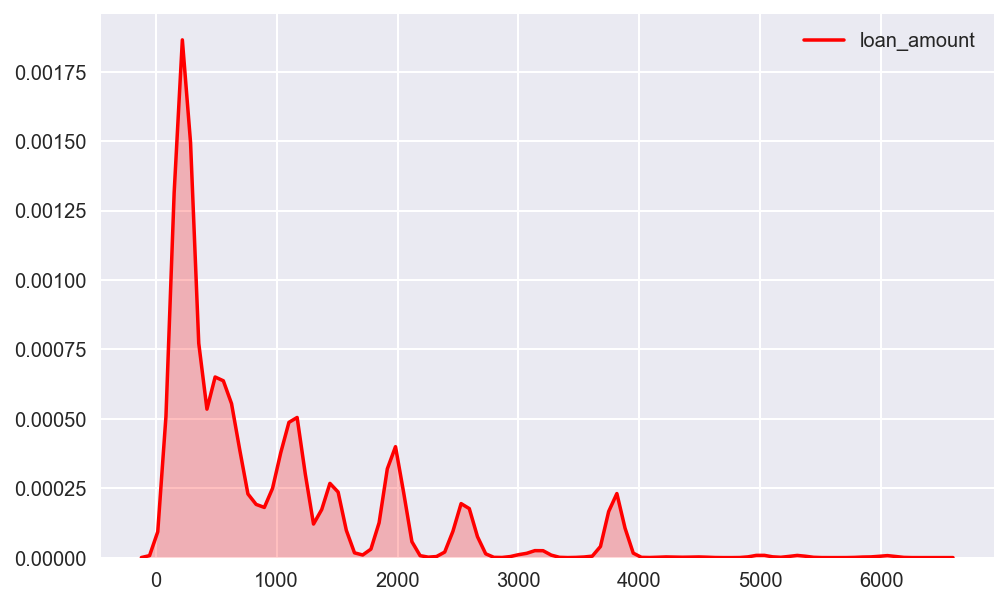

In [7]:
sns.set_style("darkgrid")
sns.kdeplot(loans.loan_amount[loans.loan_amount], color='r', shade=True);

### Funded Amount Distribution

Highly skewed because of few outliers, therefore filtering funded_amount below $5000

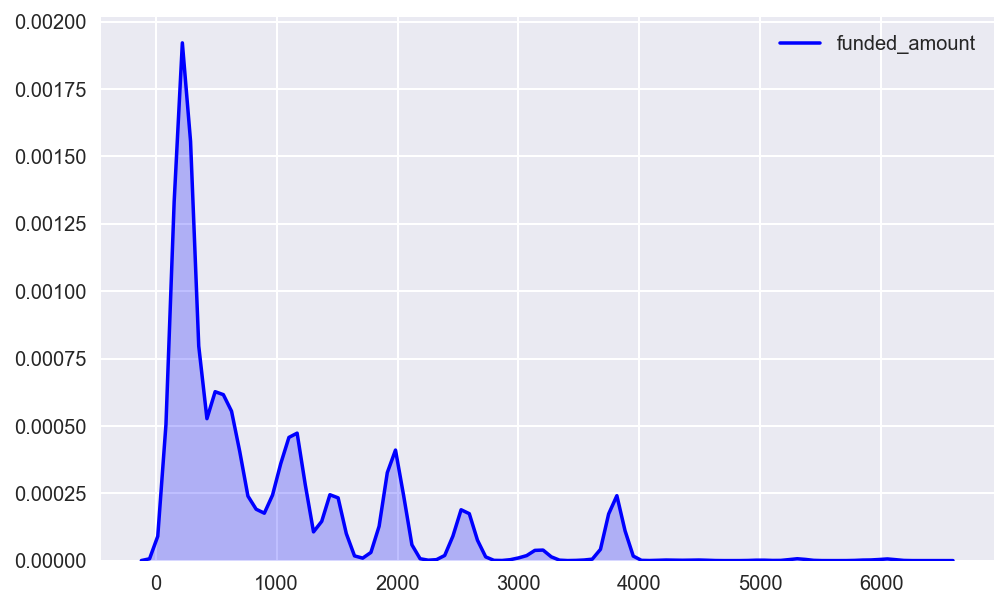

In [8]:
sns.kdeplot(loans.funded_amount[loans.funded_amount], color='b', shade=True);

**Instance when funded_amount is equal to loan_amount **

In [9]:
pd.Series()

Series([], dtype: float64)

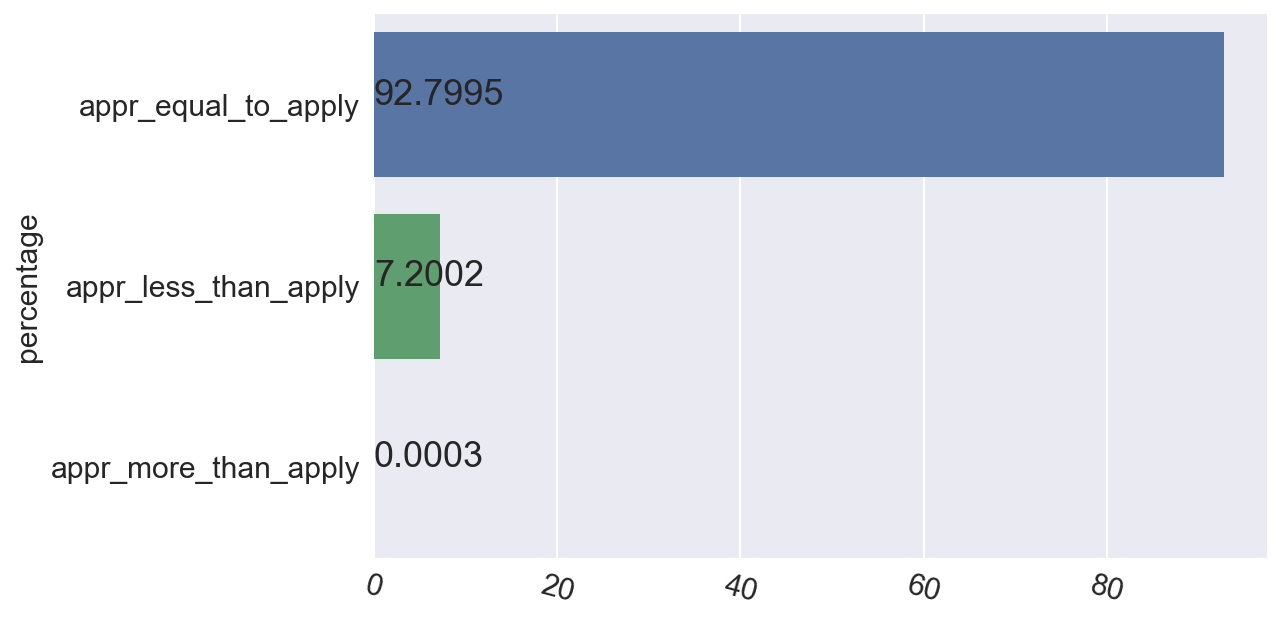

In [10]:
appr_equal_to_apply = 100*( (loans.funded_amount == loans.loan_amount).sum())/loans.shape[0]
appr_less_than_apply = 100*(loans.funded_amount < loans.loan_amount).sum()/loans.shape[0]
appr_more_than_apply = 100*(loans.funded_amount > loans.loan_amount).sum()/loans.shape[0]

temp = pd.Series([appr_equal_to_apply, appr_less_than_apply, appr_more_than_apply], 
                 index=['appr_equal_to_apply', 'appr_less_than_apply', 'appr_more_than_apply'])

sns.barplot(x=temp.values, 
            y=temp.index)

plt.title('', size=20)
plt.ylabel('percentage', size=15)
plt.xticks(size=15, rotation=-15)
plt.yticks(size=15);
for index, value in enumerate(temp.values):
    plt.text(0, index, np.round(value, 4), fontdict={'size':18})

** There are 2 instances when Funded Amount is greater than Loan Amount **

In [11]:
loans[(loans.loan_amount - loans.funded_amount) < 0]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
277188,924149,425.000000,400.000000,General Store,Retail,"to buy beverages, rice, laundry detergent, sug...",MZ,Mozambique,"Boane, Maputo",MZN,23.000000,2015-07-28 07:14:04+00:00,2015-07-22 07:00:00+00:00,NaN,17.000000,11,"#Parent, user_favorite",male,monthly,2015-07-28
338159,985199,3400.000000,3000.000000,Farm Supplies,Agriculture,"to pay for wires for the grape orchard, cover ...",AM,Armenia,"Hoktember village, Armavir region",USD,169.000000,2015-11-25 10:53:00+00:00,2015-10-29 07:00:00+00:00,NaN,38.000000,84,"#Elderly, #Job Creator, #Trees, #Vegan, user_f...",male,monthly,2015-11-25


**Insights**
- Philippines has highest number of loan application proportion and approved loans proportion
- US even though has not so many loan application, but has high number of applications which didn't get APPROVED
- Kenya has high number of loans application and high number of loan rejection count

#### Let's explore US and Kenya to see if there is any amount which gets rejected

** United States - Not approved Loans **

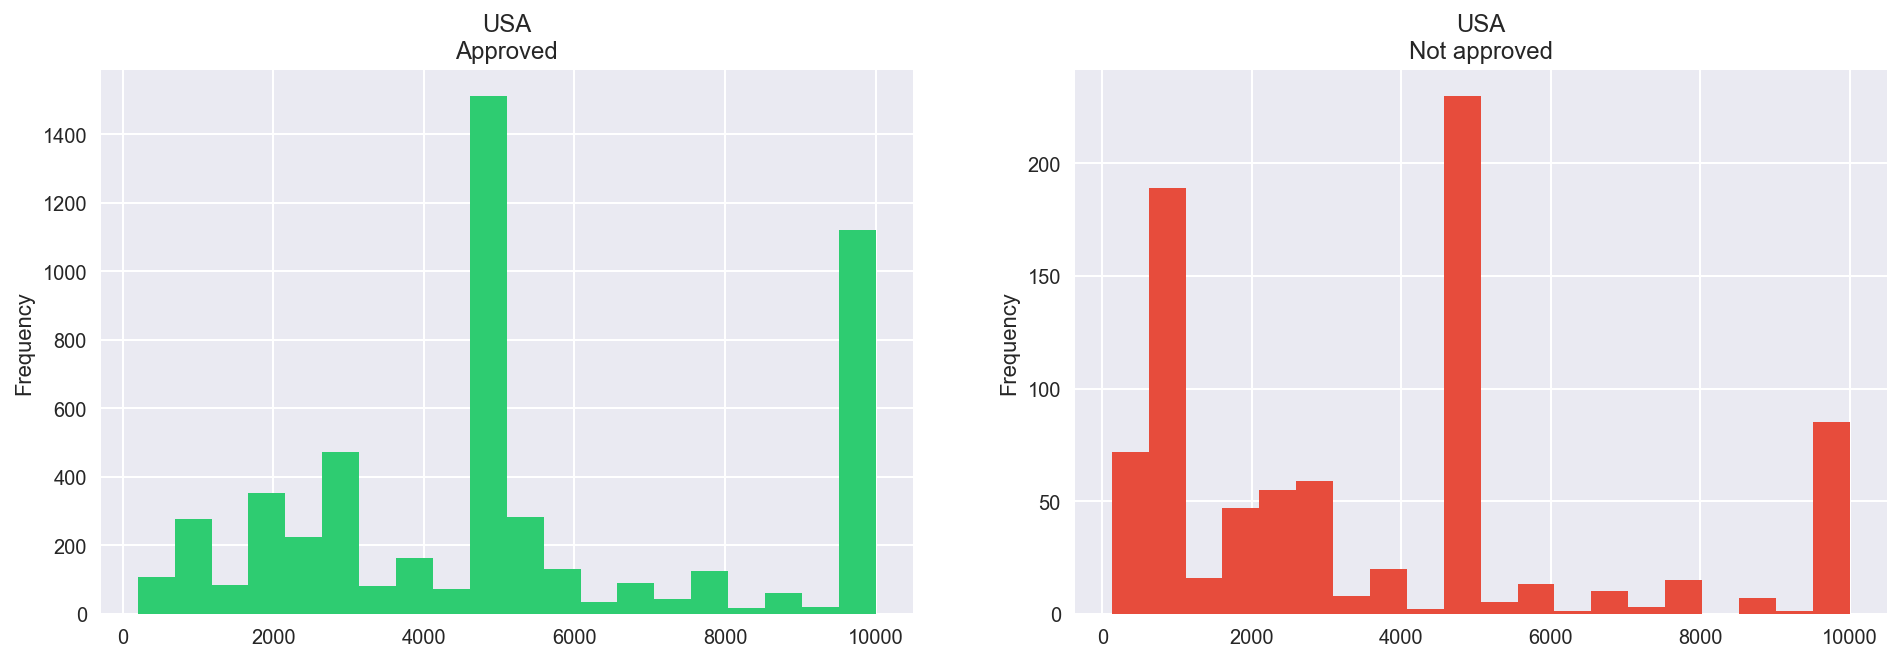

In [12]:
sns.set_style("darkgrid")

country = 'United States'

plt.figure(figsize=(16, 5))
plt.subplot(1,2, 1)
loans[(loans.funded_amount != 0) & (loans.country == country)]['loan_amount'].plot.hist(bins=20, 
                                                                                        title='USA\nApproved', 
                                                                                        color=color[5])
plt.subplot(1,2,2)
loans[(loans.funded_amount == 0) & (loans.country == country)]['loan_amount'].plot.hist(bins=20, 
                                                                                        title='USA\nNot approved', 
                                                                                        color=color[3]);

Interestingly lot of loan application of amount between USD 500 - 1000 gets rejected. <p>** From around 300 applications 180 got rejected.**

** Kenya Not Approved loans **

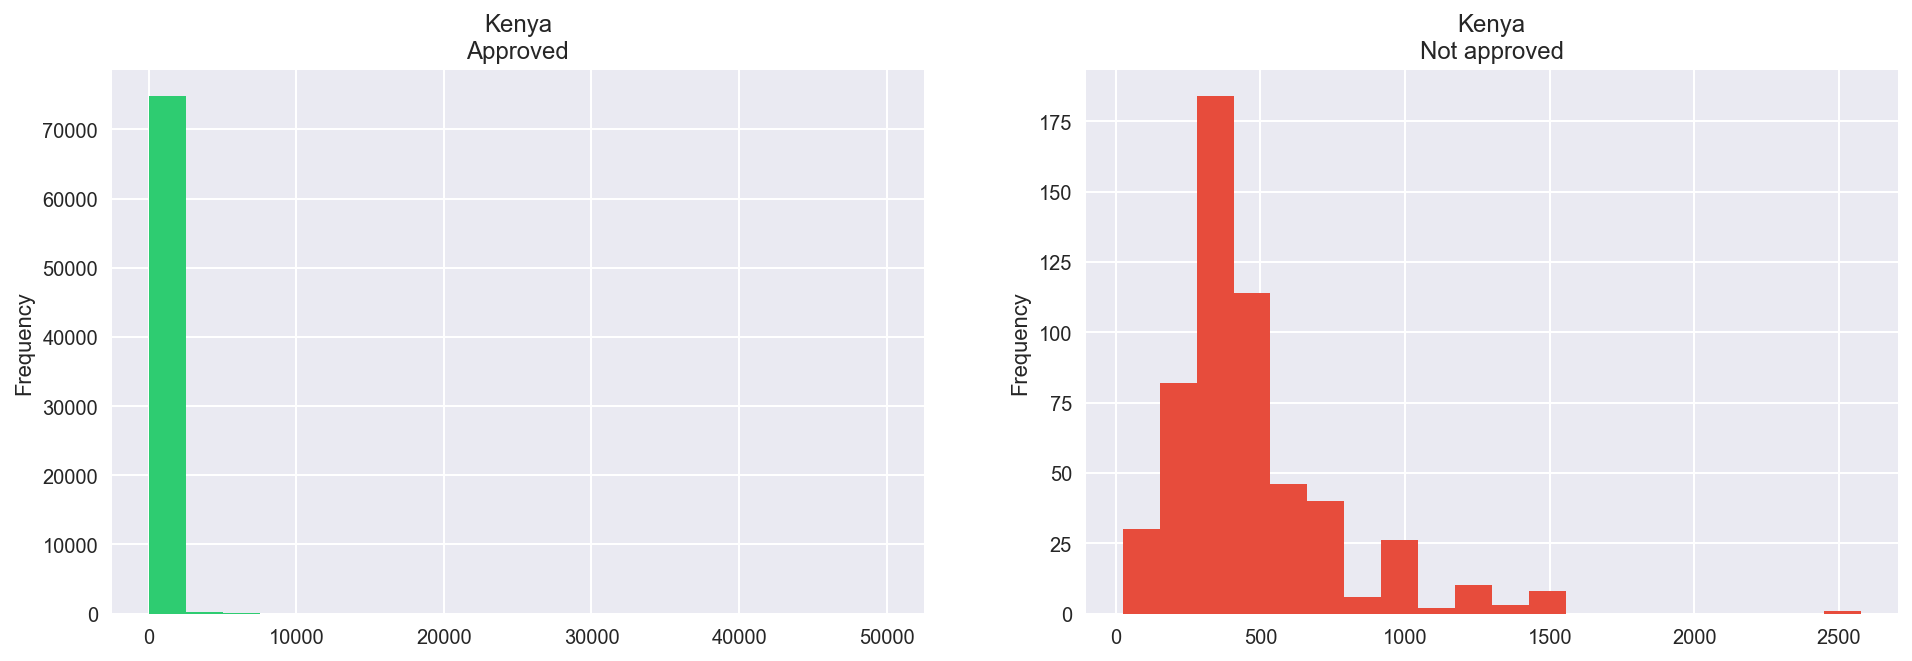

In [13]:
country = 'Kenya'

plt.figure(figsize=(16, 5))
plt.subplot(1,2, 1)
loans[(loans.funded_amount != 0) & (loans.country == country)]['loan_amount'].plot.hist(bins=20, 
                                                                                        title='Kenya\nApproved', 
                                                                                        color=color[5])
plt.subplot(1,2,2)
loans[(loans.funded_amount == 0) & (loans.country == country)]['loan_amount'].plot.hist(bins=20, 
                                                                                        title='Kenya\nNot approved', 
                                                                                        color=color[3]);

## b) Loan Application Exploration

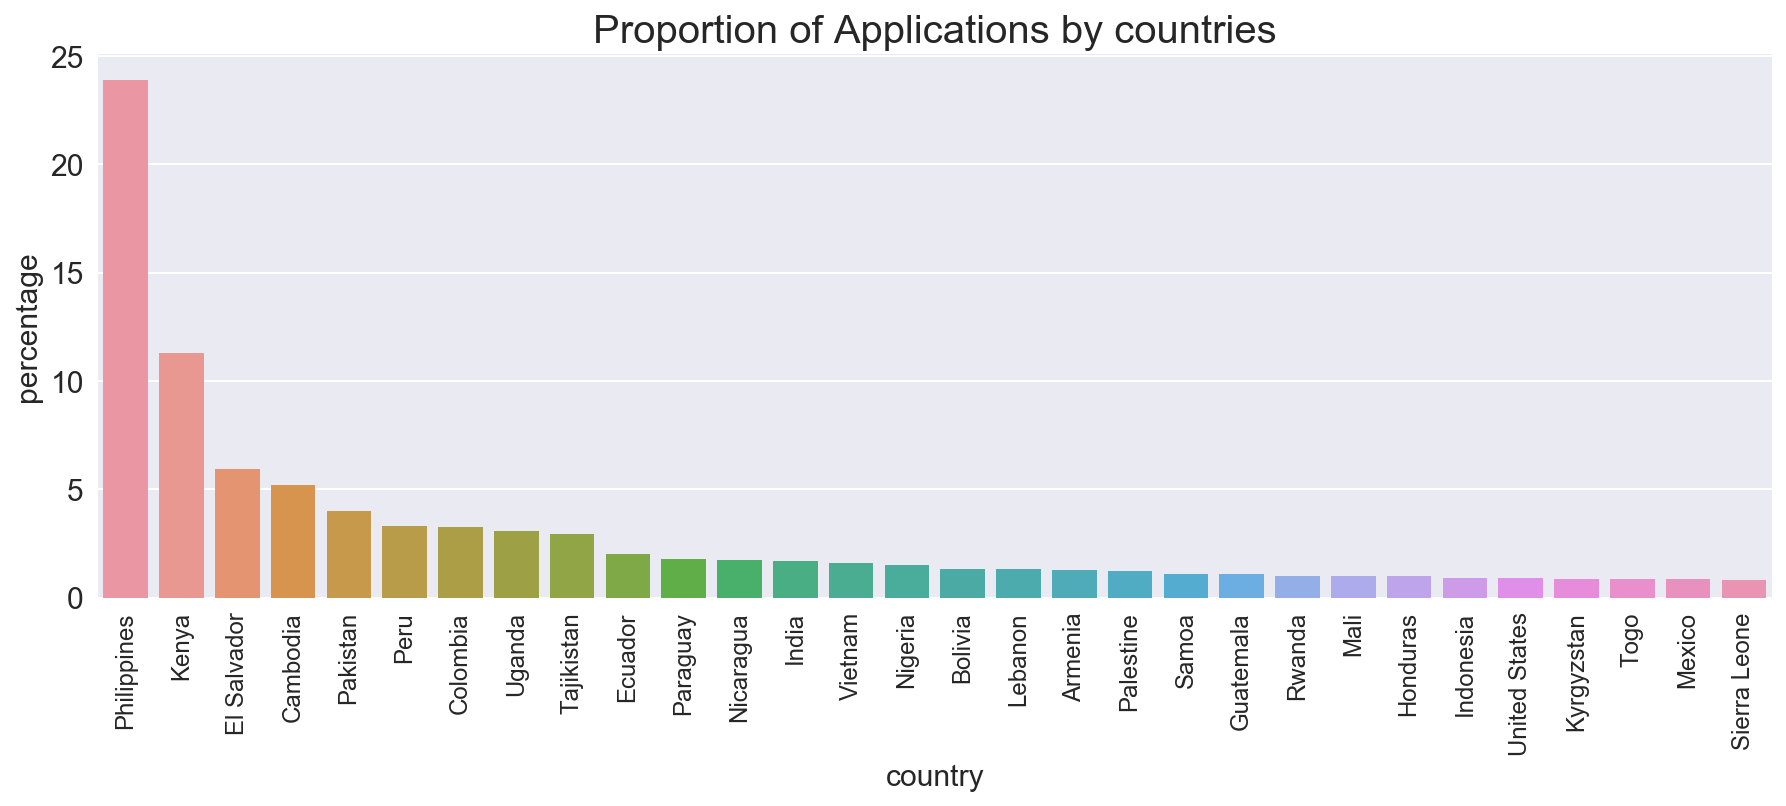

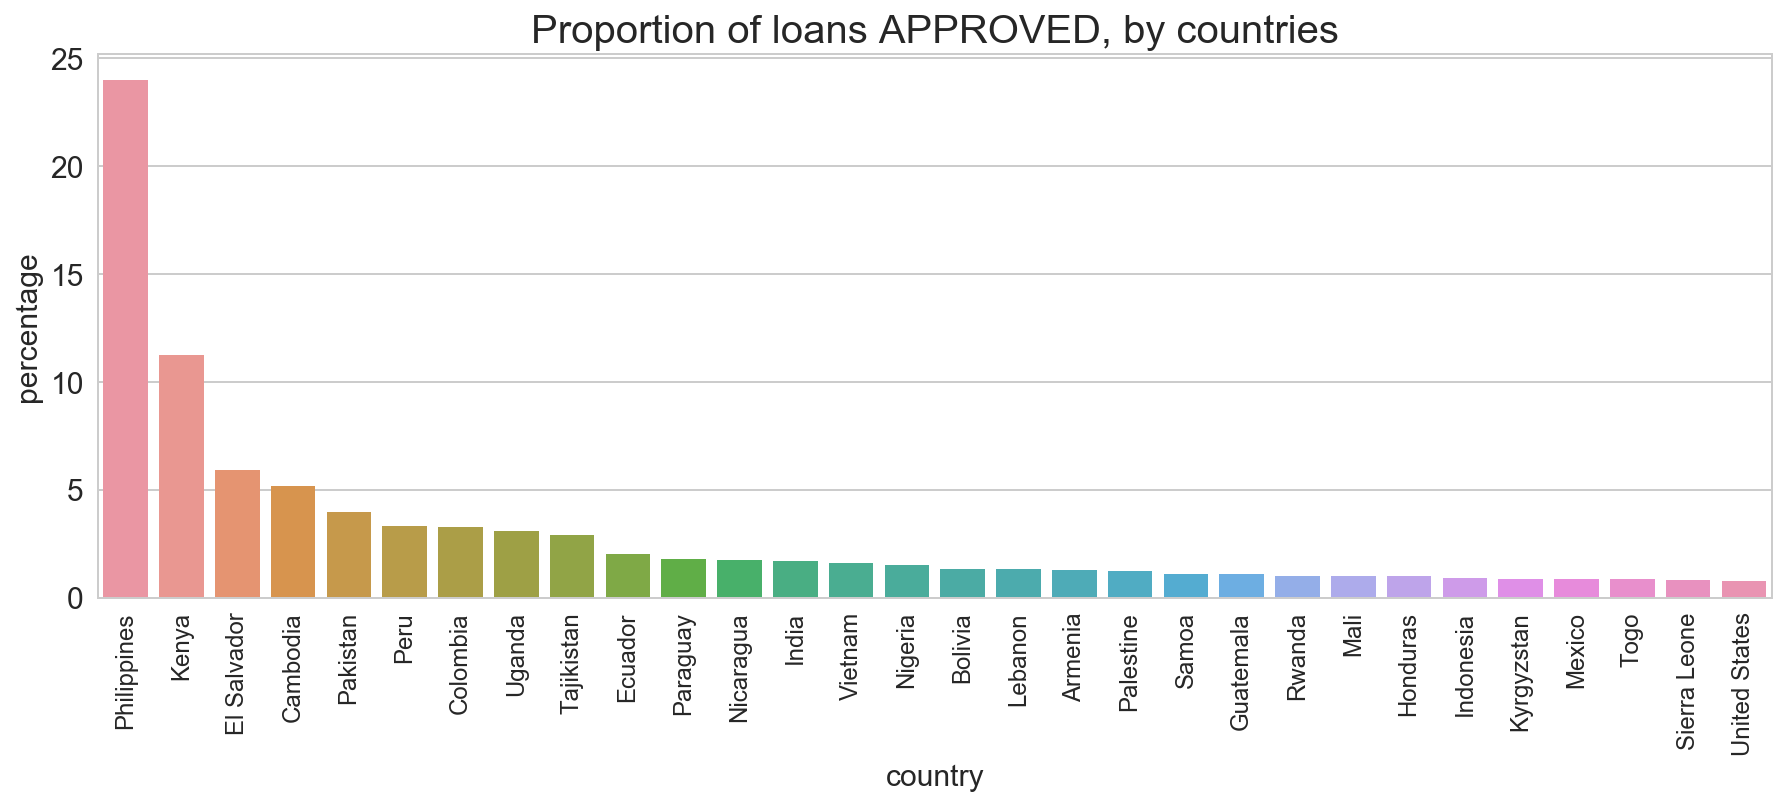

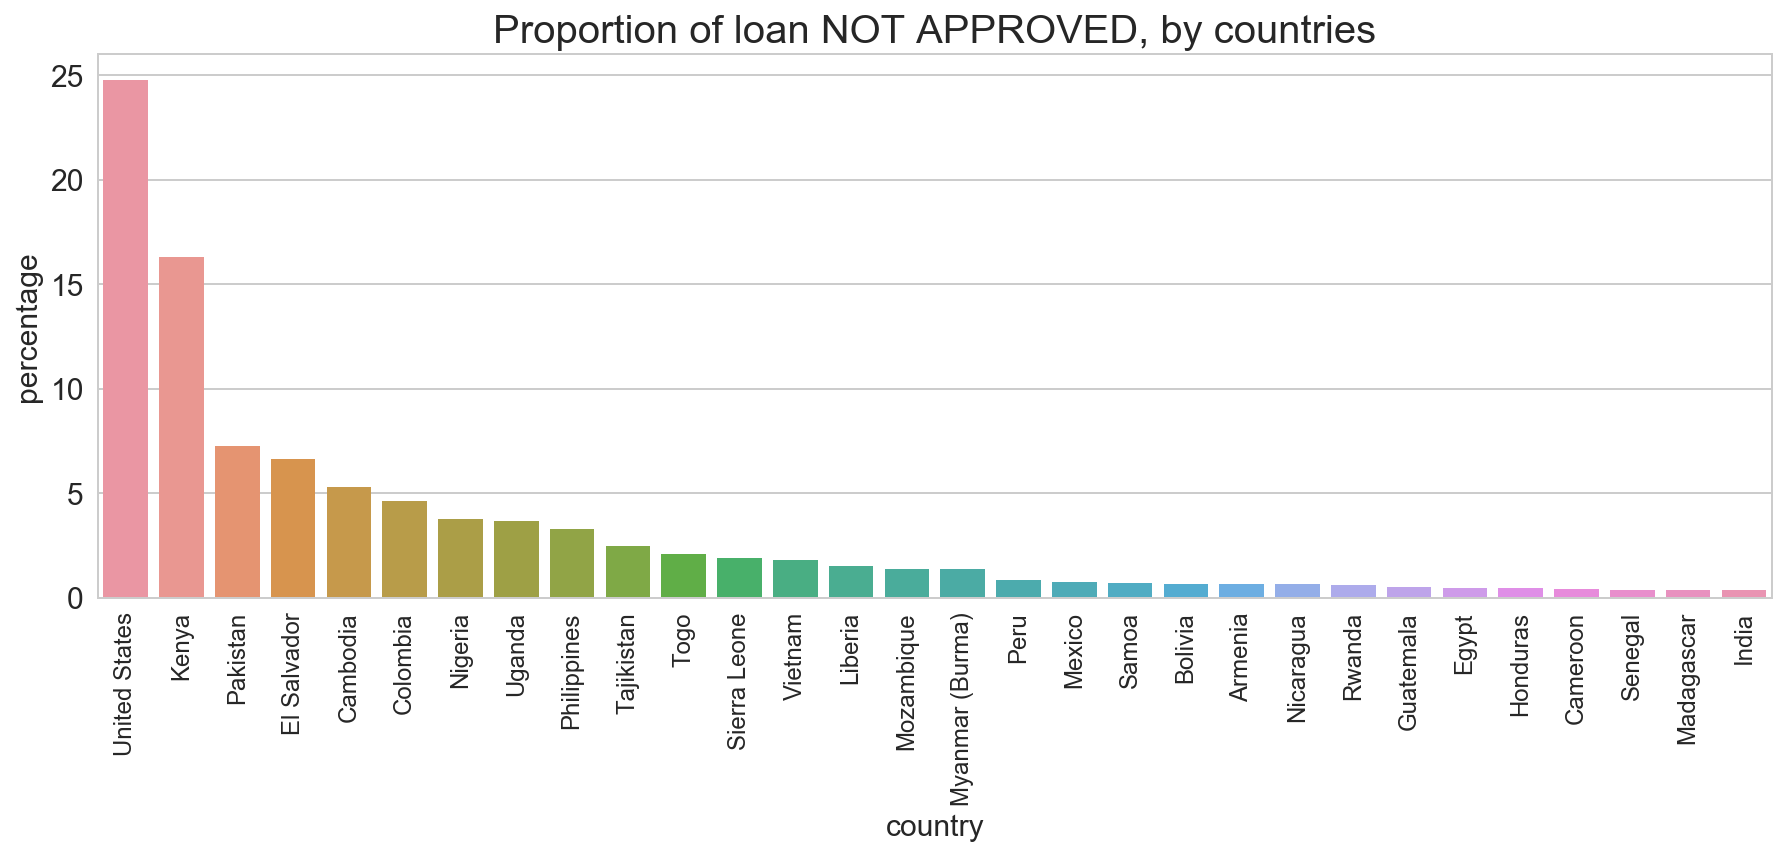

In [14]:
proportion_plot(loans.country, 
                title='Proportion of Applications by countries', 
                figsize=(15, 5), top=30)


proportion_plot(loans[loans.funded_amount != 0].country, 
                title='Proportion of loans APPROVED, by countries', 
                figsize=(15, 5), top=30)

proportion_plot(loans[loans.funded_amount == 0].country, 
                title='Proportion of loan NOT APPROVED, by countries', 
                figsize=(15, 5), top=30)

### c) Lenders Exploration

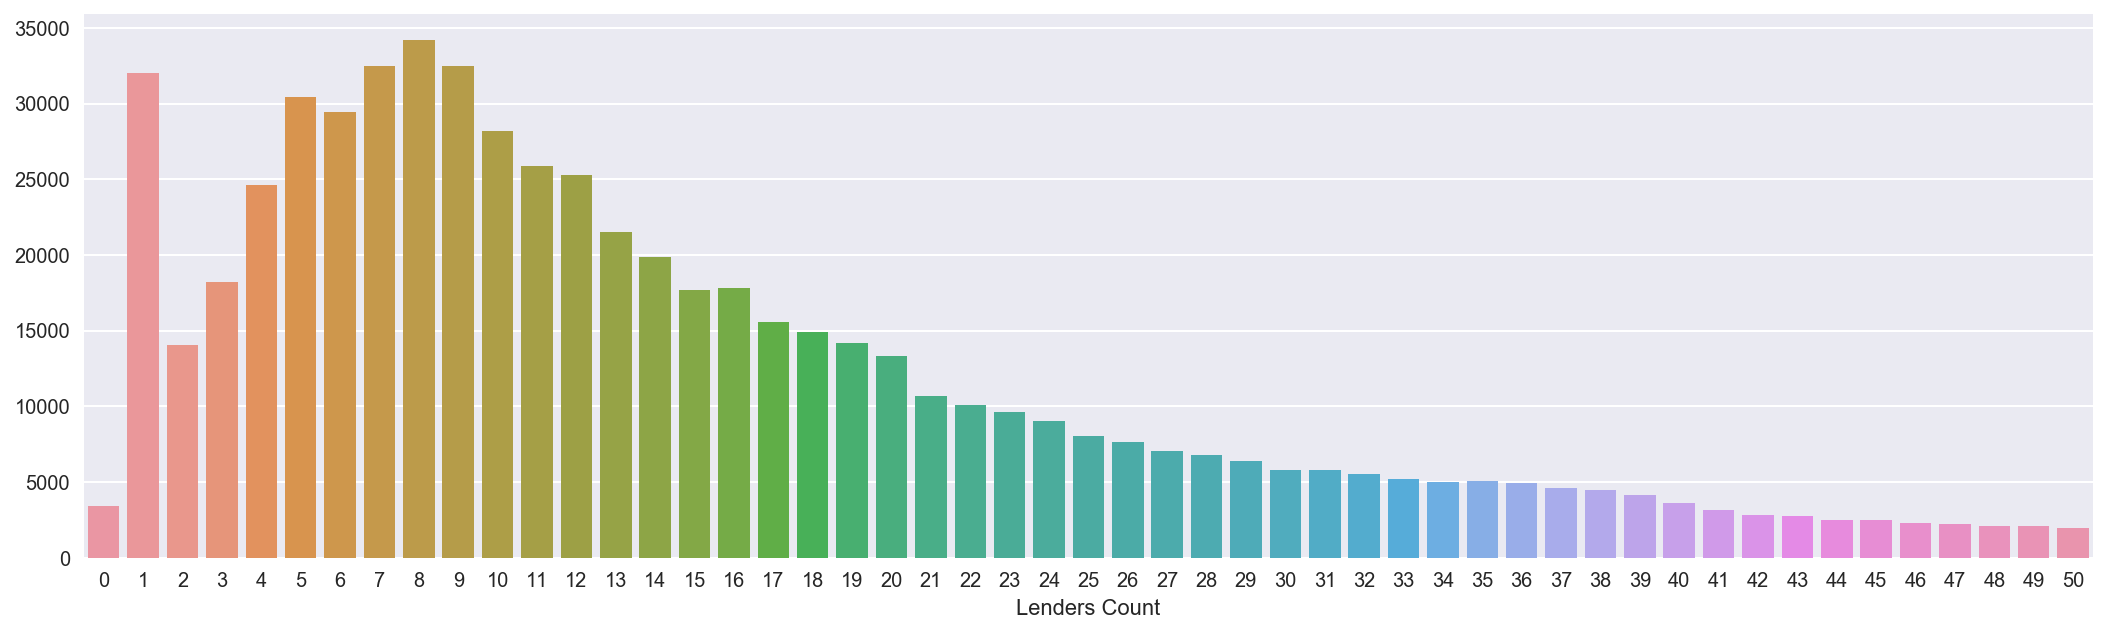

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(18, 5))
lender_count =loans[loans.lender_count <= 50].lender_count.value_counts()

sns.barplot(x=lender_count.index, y=lender_count.values)
plt.xlabel('Lenders Count');

** Country-wise mean lenders count **

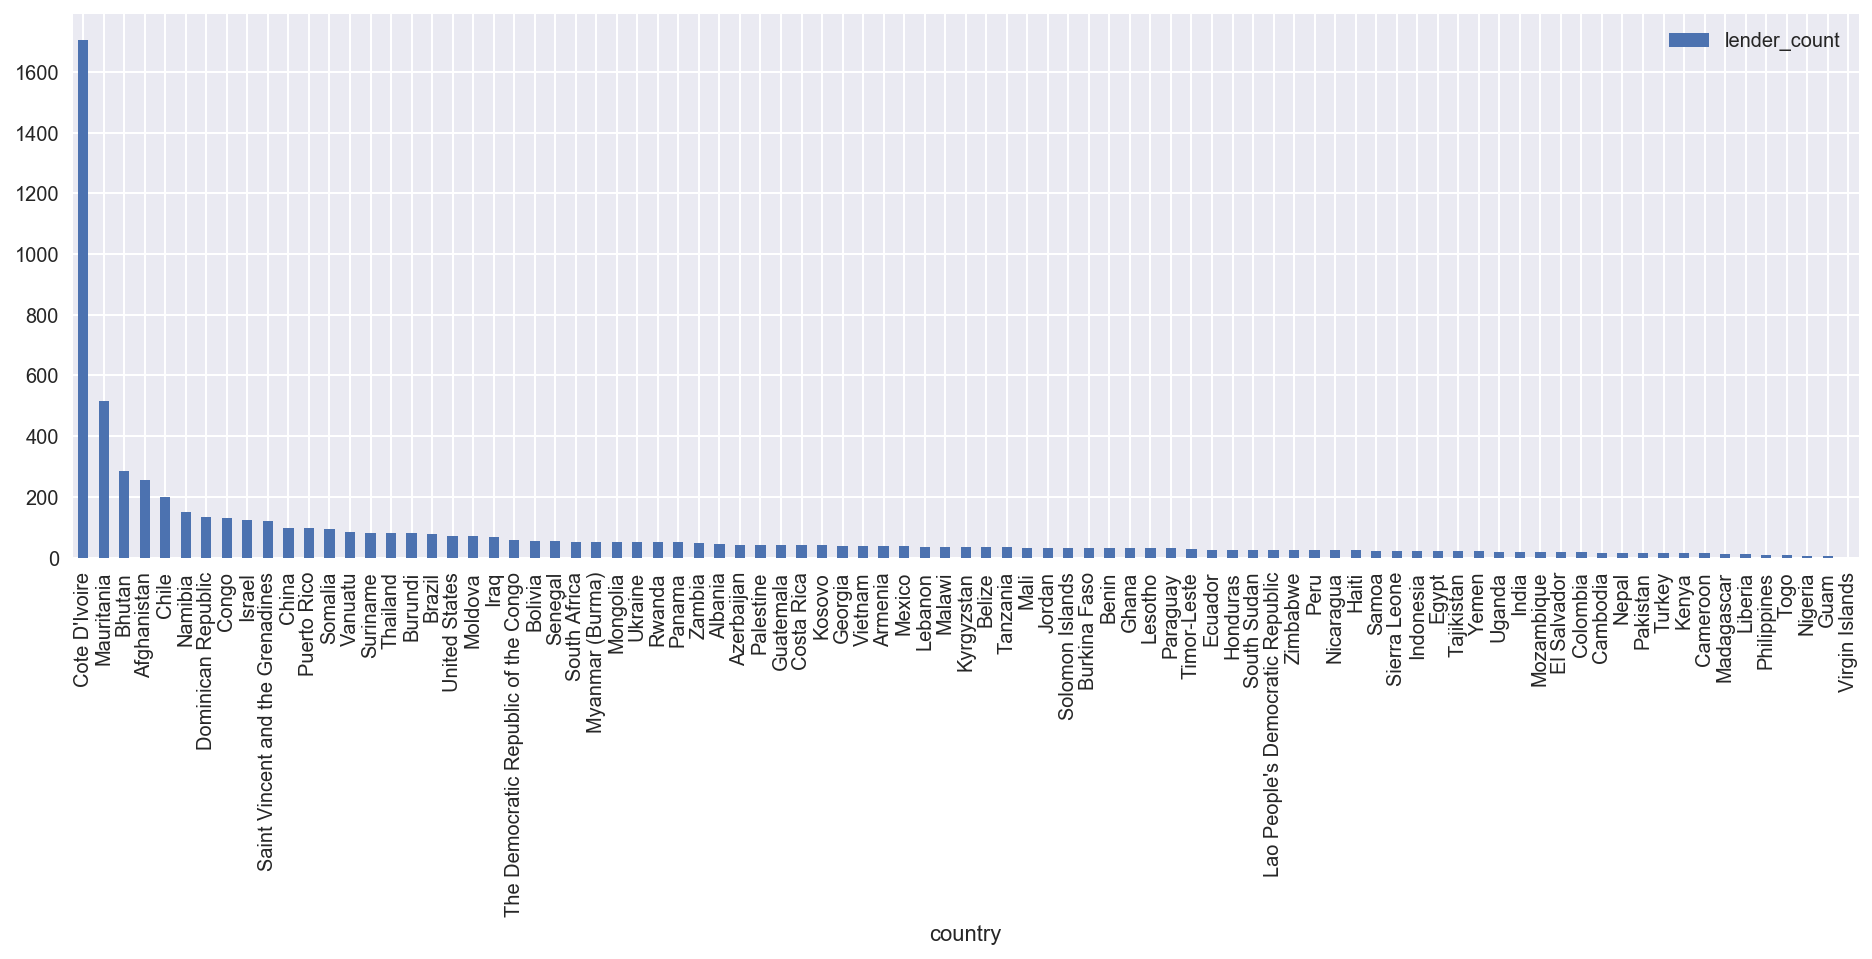

In [16]:
loans.groupby(['country']).agg({'lender_count':'mean'}).sort_values(by='lender_count',ascending=False).plot.bar(figsize=(16, 5))

### Terms in Month

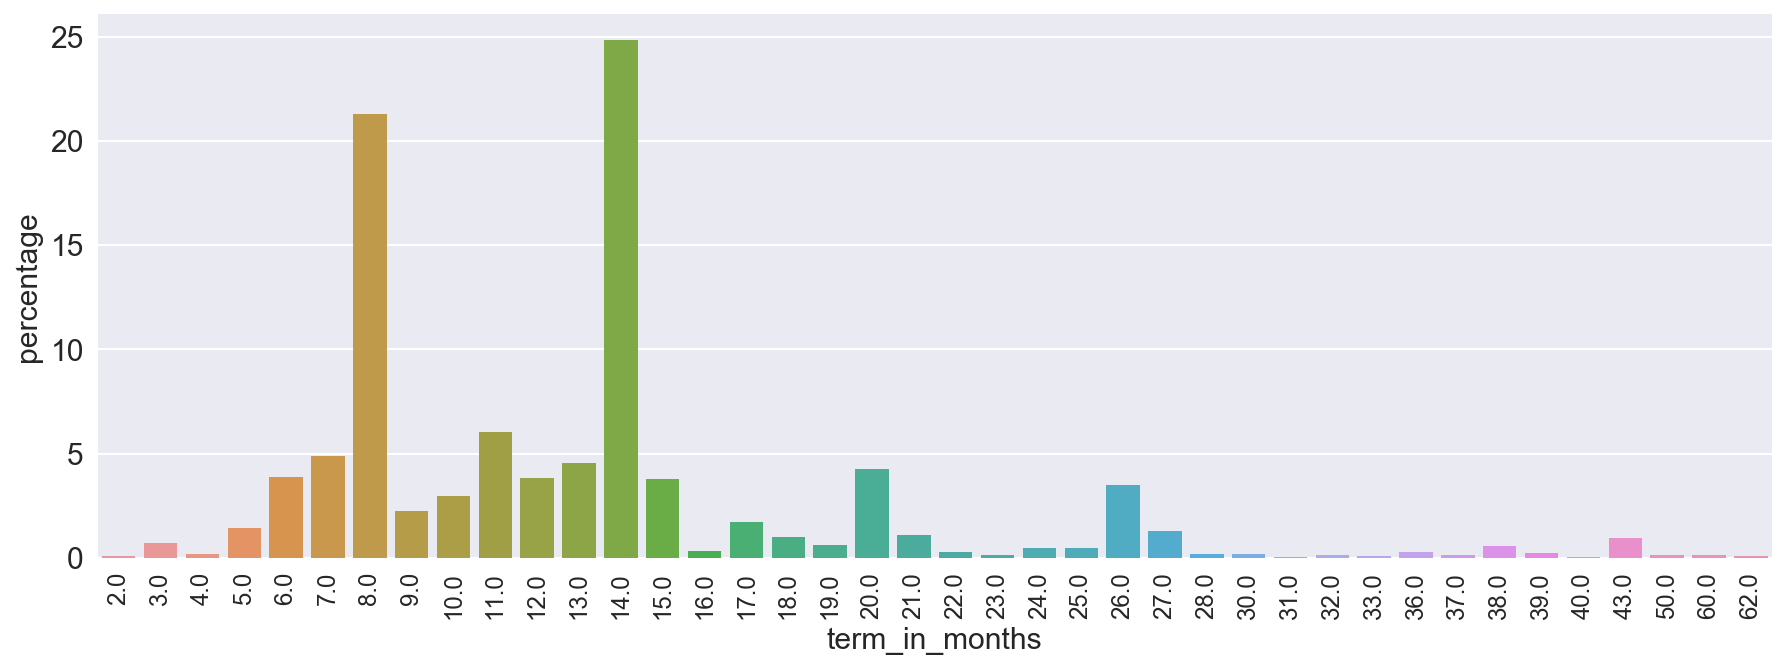

In [17]:
proportion_plot(loans.term_in_months, top=40)

25% loans have 14 months of repayment term and 21% have 8 months of repayment term

### Funded Amount Vs Terms in Month

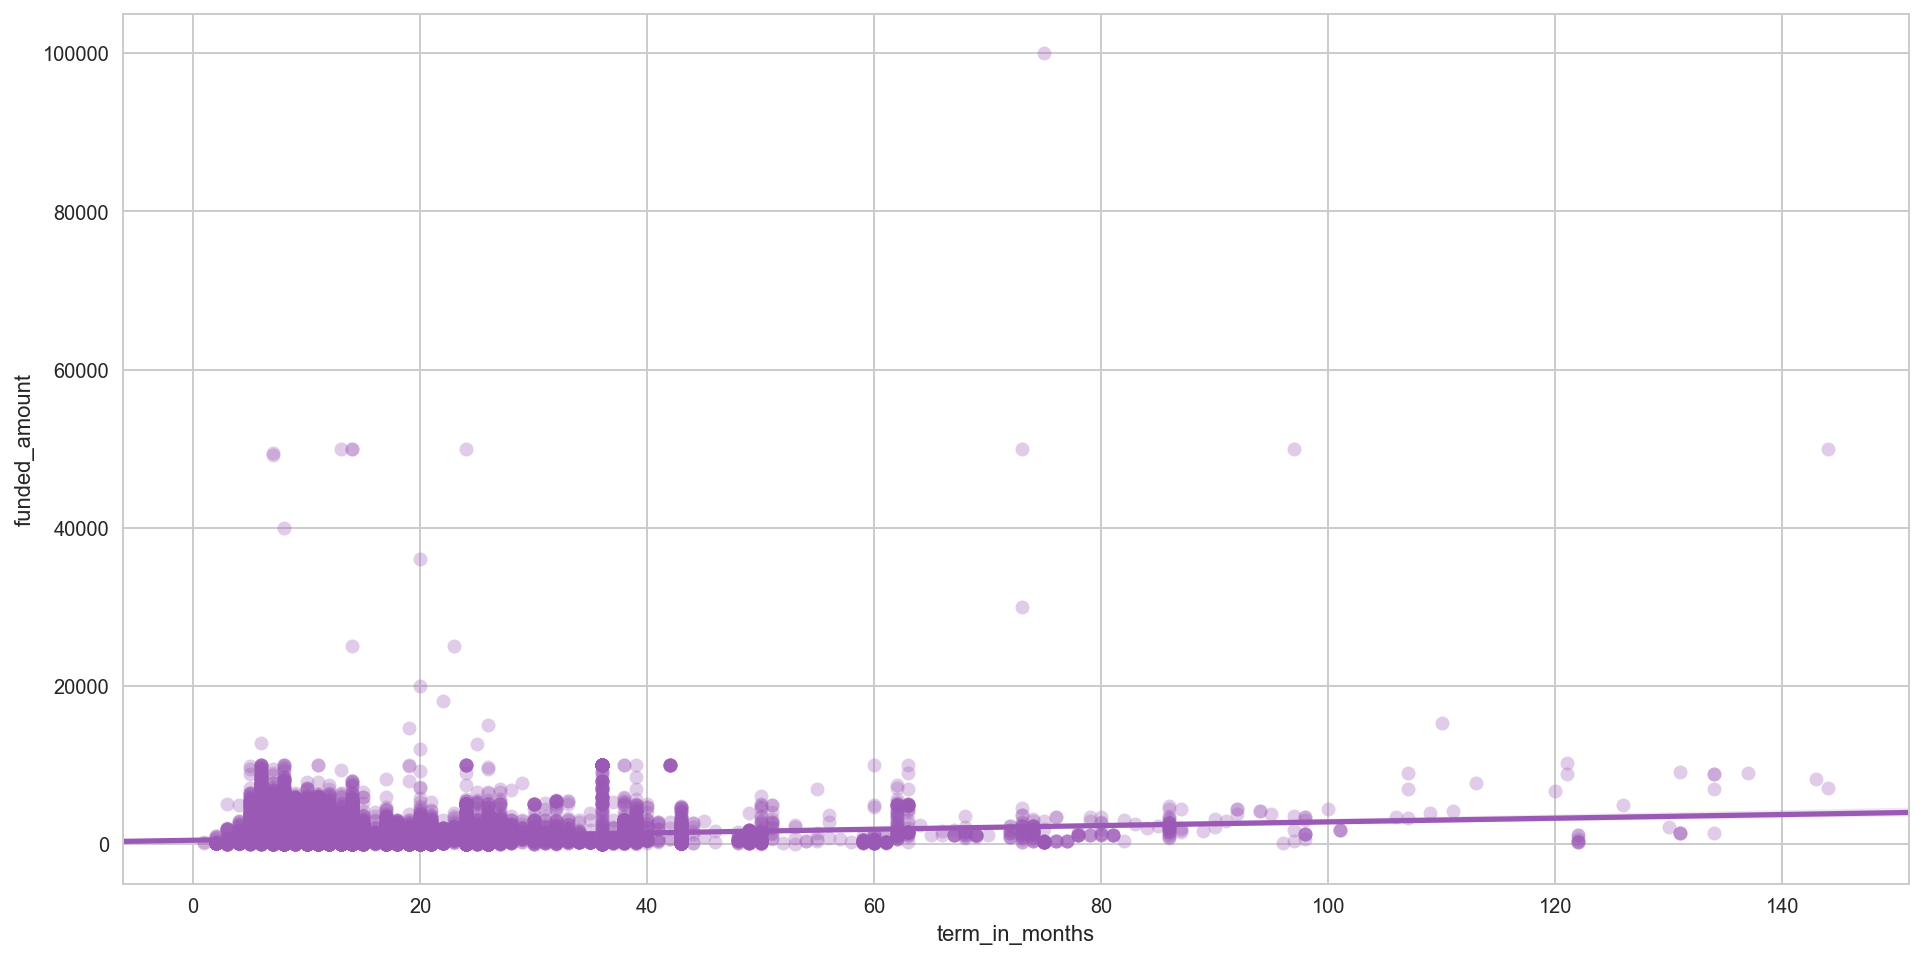

In [18]:
plt.figure(figsize=(16, 8))
sns.regplot(x="term_in_months", y="funded_amount", data=loans.sample(frac=.1, random_state=SEED), 
            color=color[0],scatter_kws={'alpha':0.3});

In [19]:
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [20]:
temp=loans['country'].value_counts().reset_index()


In [21]:
temp.head(2)

,index,country
0,Philippines,160441
1,Kenya,75825


In [22]:
temp.columns = ['country', 'value']

In [23]:
data = dict(type = 'choropleth', 
           locations = temp['country'],
           locationmode = 'country names',
           z = temp['value'], 
           text = temp['country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Loan Application Count', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

** Word Cloud of Tags **

In [24]:
# from wordcloud import WordCloud, STOPWORDS
# stopwords = set(STOPWORDS)

# wordcloud = WordCloud(
#                           background_color='white',
#                           stopwords=stopwords,
#                           max_words=200,
#                           max_font_size=40, 
#                           random_state=42
#                          ).generate(str(loans['tags']))

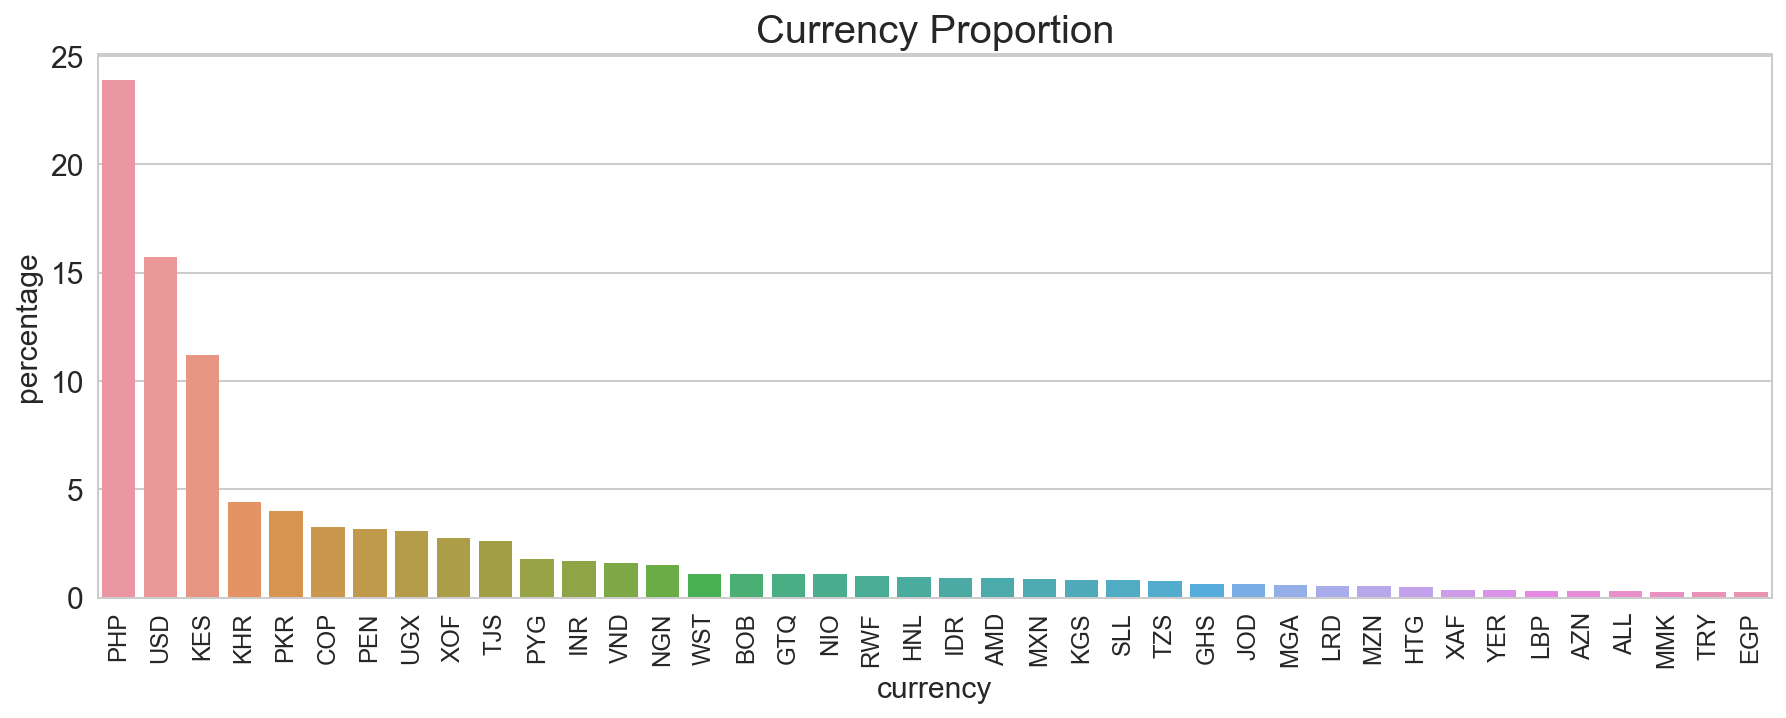

In [26]:
proportion_plot(loans.currency, title='Currency Proportion', top=40)

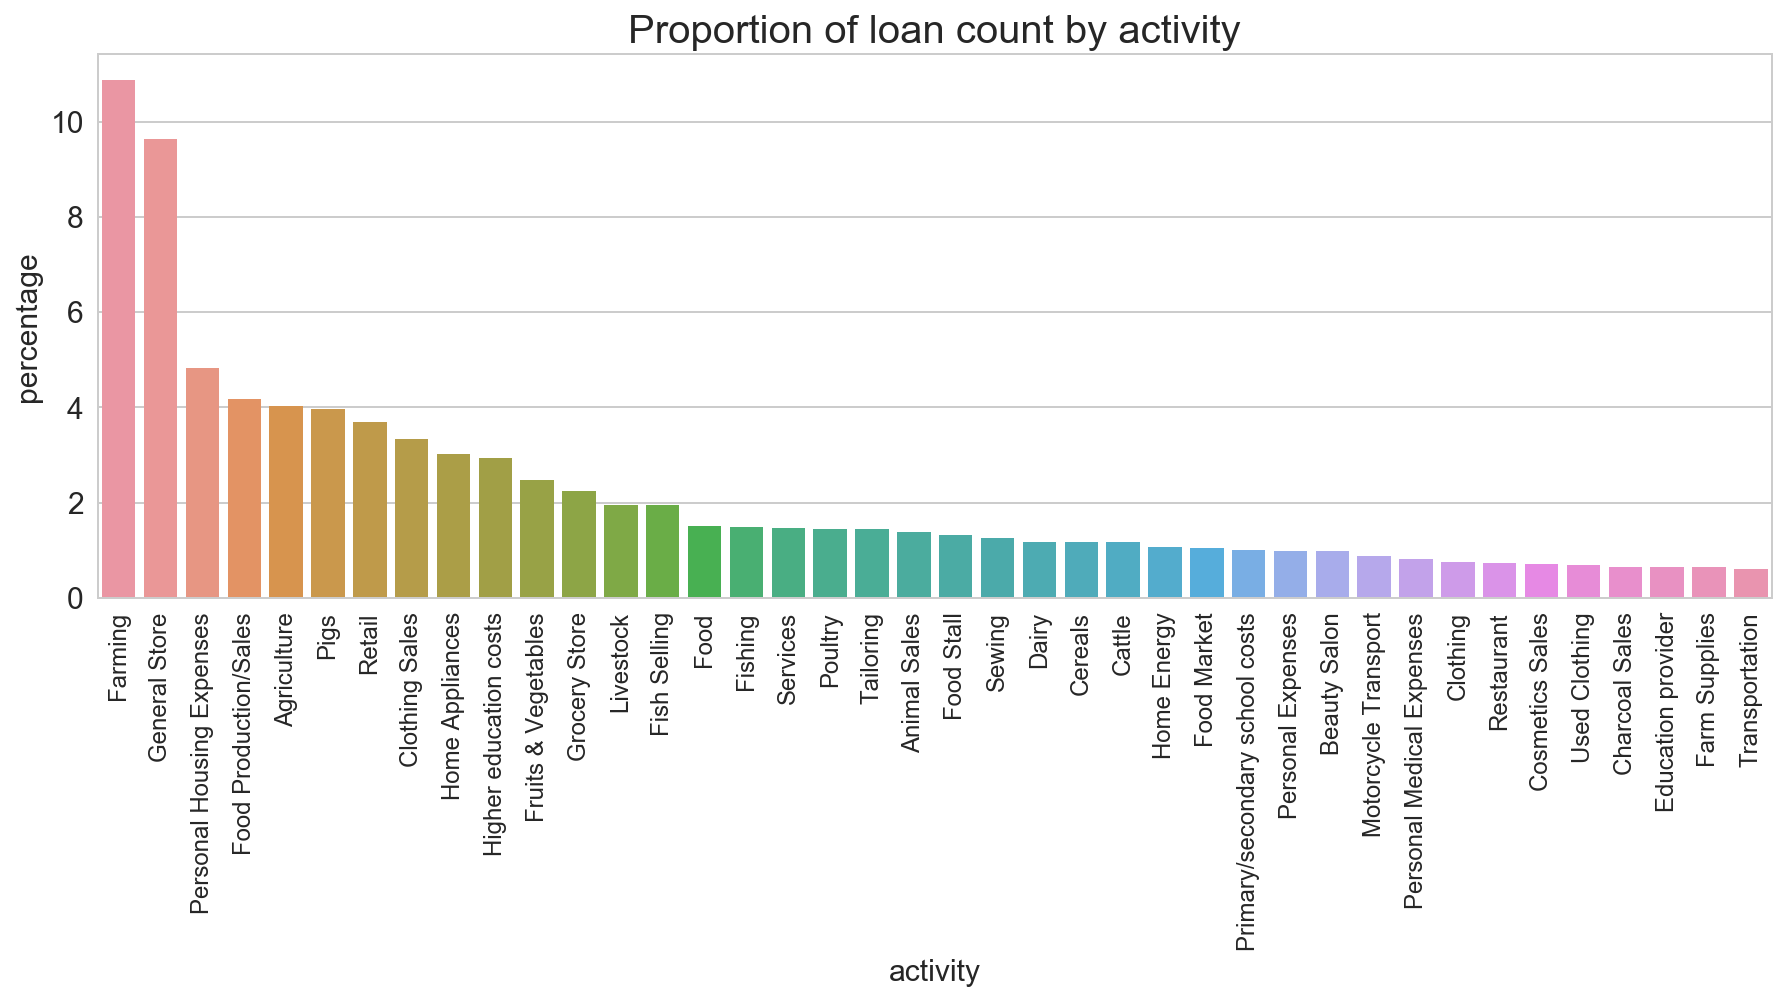

In [27]:
proportion_plot(loans.activity, title='Proportion of loan count by activity', figsize=(15, 5), top=40)

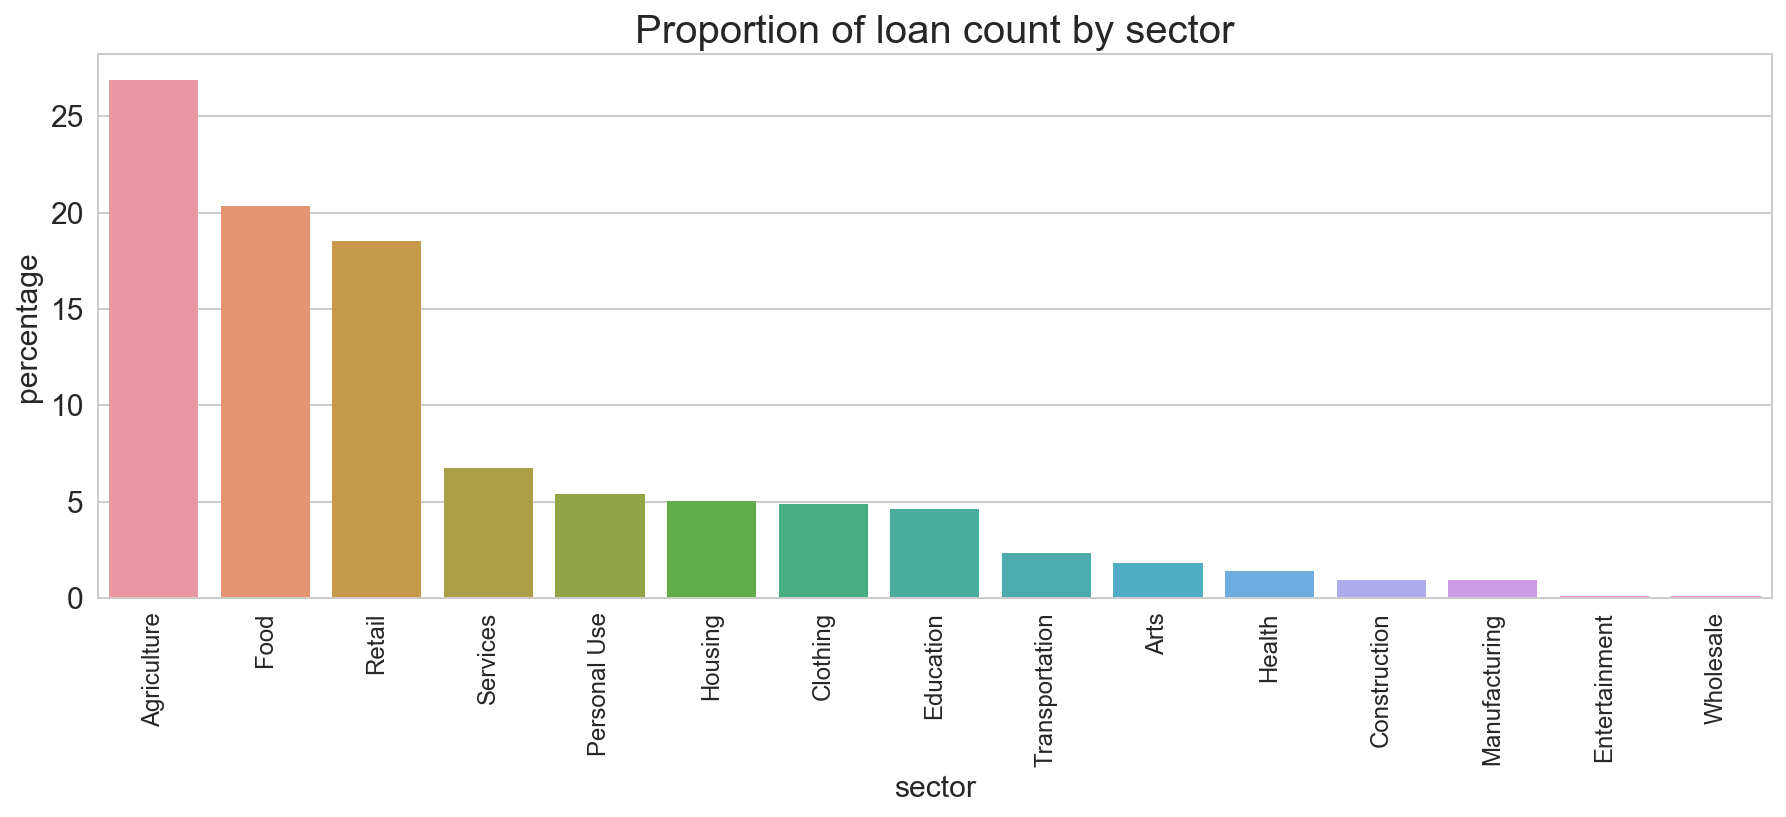

In [28]:
proportion_plot(loans.sector, figsize=(15, 5), title='Proportion of loan count by sector')

In [29]:
# sector_repayment = ['sector', 'repayment_interval']
# cm = sns.light_palette("red", as_cmap=True)
# pd.crosstab(loans[sector_repayment[0]], loans[sector_repayment[1]]).style.background_gradient(cmap = cm)

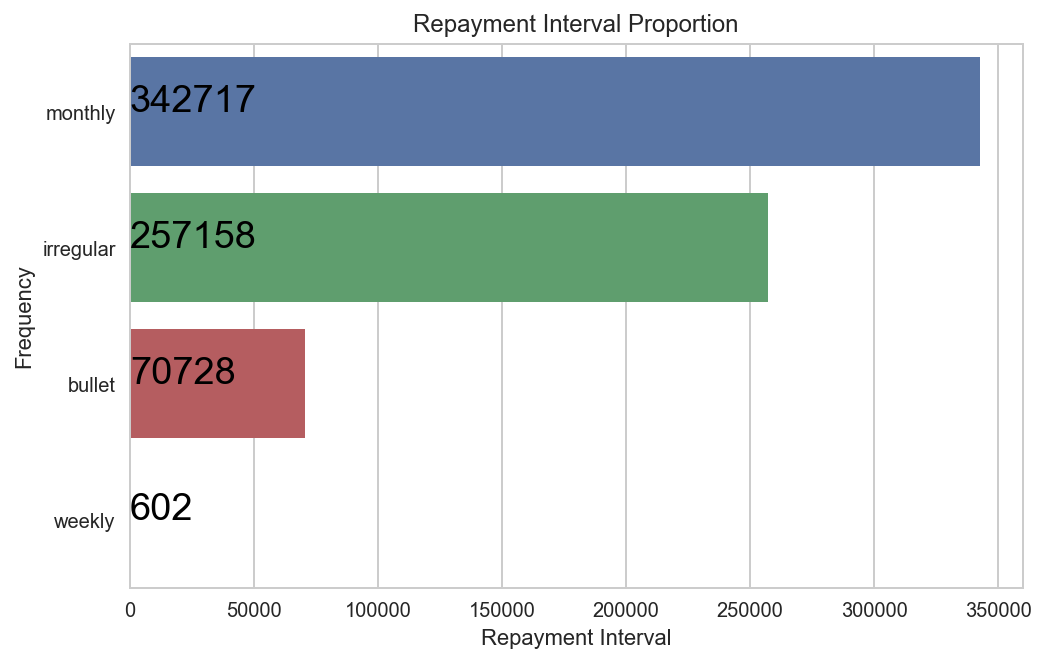

In [30]:
repayment = loans.repayment_interval.value_counts()
sns.barplot(x = repayment.values, y = repayment.index);
for i, v in enumerate(repayment.values):
    plt.text(0.8, i, v, color='k',fontsize=19)
plt.xlabel('Repayment Interval')
plt.ylabel('Frequency')
plt.title('Repayment Interval Proportion');

### Gender Exploration

In [31]:
countries_funded_amount = loans.groupby('country').mean()['funded_amount'].sort_values(ascending = False)
print("Top Countries with funded_amount(Dollar value of loan funded on Kiva.org)(Mean values)\n",countries_funded_amount.head(10))

Top Countries with funded_amount(Dollar value of loan funded on Kiva.org)(Mean values)
 country
Cote D'Ivoire        50000.000000
Mauritania           15000.000000
Bhutan                7812.500000
Chile                 7625.000000
Afghanistan           7000.000000
Congo                 6142.578125
Puerto Rico           4409.191176
Dominican Republic    4200.604839
Namibia               4046.875000
United States         3800.843591
Name: funded_amount, dtype: float64


In [32]:
# a = loans.borrower_genders[15213]
loans['female_borrower_count']= loans.borrower_genders.apply(lambda x: str(x).split(', ').count('female'))
loans['male_borrower_count']= loans.borrower_genders.apply(lambda x: str(x).split(', ').count('male'))

In [33]:
borrowers_percent = dict()
borrowers_percent['female'] = 100*loans['female_borrower_count'].sum()/(loans['female_borrower_count'].sum() + loans['male_borrower_count'].sum())
borrowers_percent['male'] = 100*loans['male_borrower_count'].sum()/(loans['female_borrower_count'].sum() + loans['male_borrower_count'].sum())
print('Female borrowers percentage: {:.2f} %'.format(borrowers_percent['female']))
print('Male borrowers percentage: {:.2f} %'.format(borrowers_percent['male']))

Female borrowers percentage: 79.58 %
Male borrowers percentage: 20.42 %


In [34]:
gender_prop = pd.Series(borrowers_percent)
for i, j in enumerate(gender_prop.values):
    print(i, j)

0 79.5794421681
1 20.4205578319


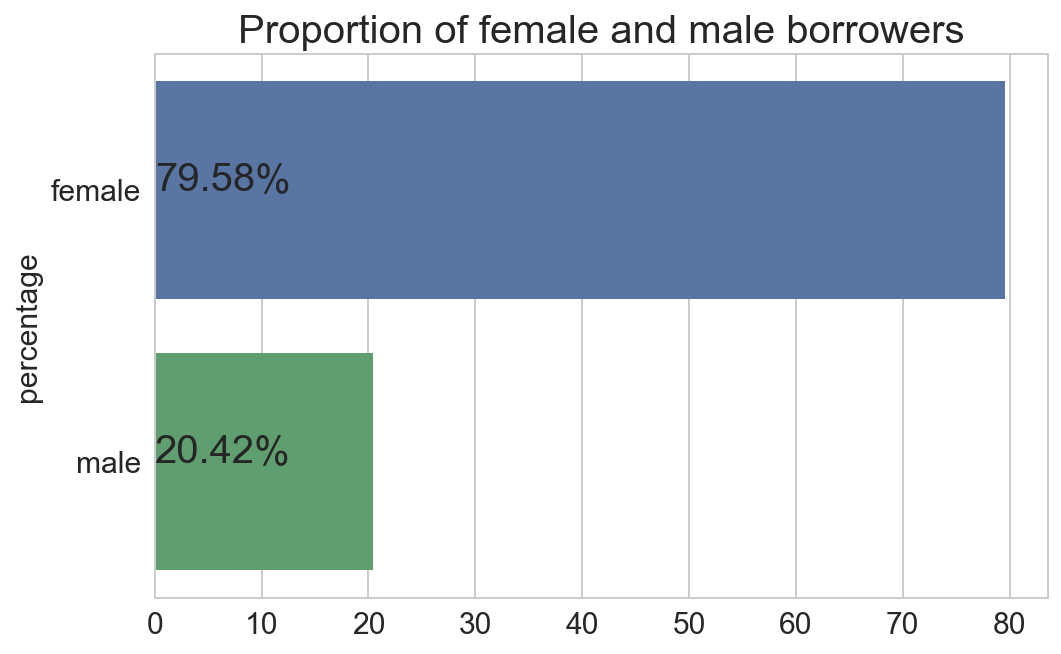

In [35]:
gender_prop = pd.Series(borrowers_percent)
g = sns.barplot(y=gender_prop.index, x=gender_prop.values)
plt.title('Proportion of female and male borrowers', size=20)
plt.ylabel('percentage', size=15)
plt.xticks(size=15)
plt.yticks(size=15);
for gender, value in enumerate(gender_prop.values):
    plt.text(x=0, y=gender, s=(str(np.round(value, 2))+ "%"),fontdict={'size':20})

# _To Be Continue..._